# **E-Commerce sales analysis project**

This project is my first project using SQL and PowerBI. The data consists of information on the customers, sales and products for an E-commerce business in the United States between 2014-2017. The aim of this project is to use both data analysis tools to deliver business insight and demonstrate my knowledge gained through learning both tools online via Udemy.

The objectives are to answer the following

### 1. Customer analysis

*Who are the 10 largest customers by total sales?*

### 2. Cities analysis ##

*Create a report showing the top 3 cities per state ranked by their unique orders*

### 3. Seasonality analysis

*Analyse the Chair sub-category to determine if there seasonality in the sales.*

### 4. Dashboard in PowerBI
*The Sales Manager will be heading to a meeting with the Directors to review overall sales. Create a dashboard in PowerBI with key Sales data including highest and lowest sale, highest and lowest profit and graphs for 10 largest customers by total sales and the sales in the top 3 cities of the top 4 states.*

### 5. Recommendations

*Finally make recommendations based on the above how the business can improve its sales.*

# Creating Database and importing CSV file

Before beginning any analysis it is important to load the data into Postgres SQL. To do so a new database named "Retail Sales" was created and clicking the query tool enters the command interface to runs commands needed to create and import the csv data into the relevant tables.

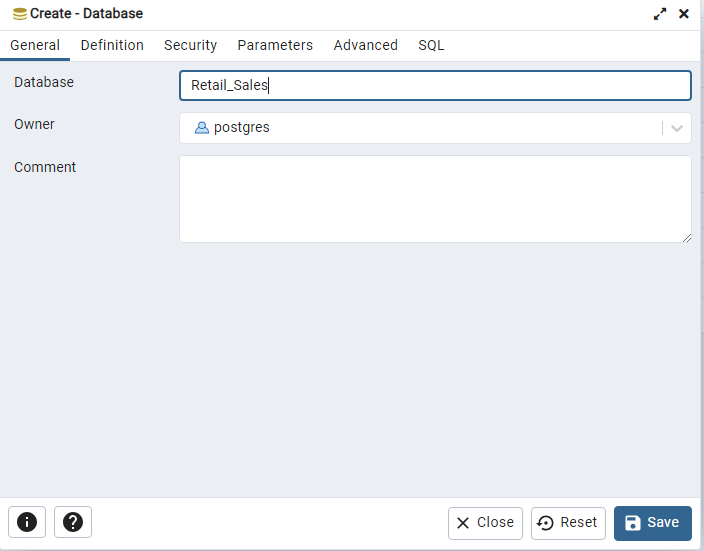
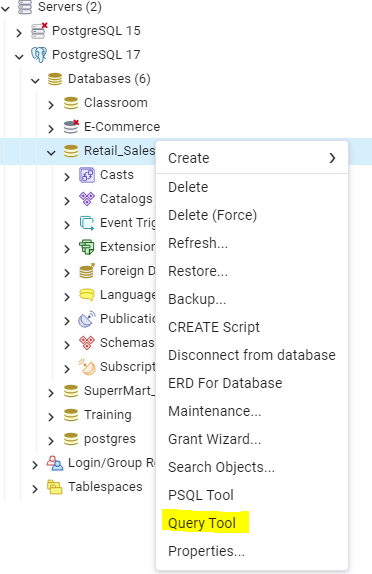

Once in the Query Tool tables are created using the CREATE TABLE command and data is imported from the csv files using the COPY FROM command for customer, product and sales. Below is the command for the customer table:

In [ ]:
CREATE TABLE customer (

customer_id varchar primary key,
customer_name varchar,
segment varchar,
age int,
country varchar,
city varchar,
state varchar,
postal_code bigint,
region varchar);

COPY customer FROM 'C:\Program Files\PostgreSQL\15\data\1 Data Copy\SuperMart_DB\CSV files\Customer.csv' CSV header;


The data is now imported and looks fine. Using the SELECT * FROM command below are what each table look like:

Customer table

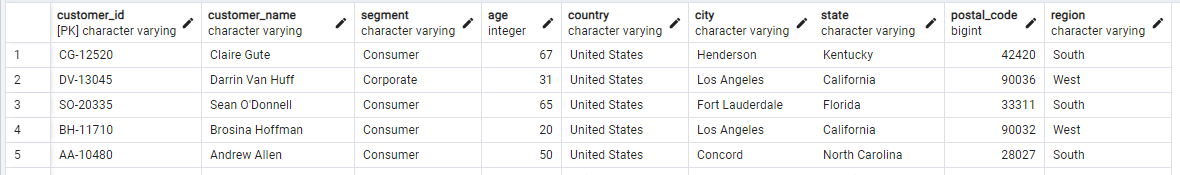

Product table

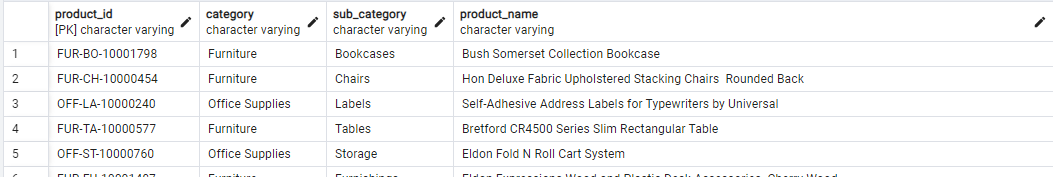

Sales table

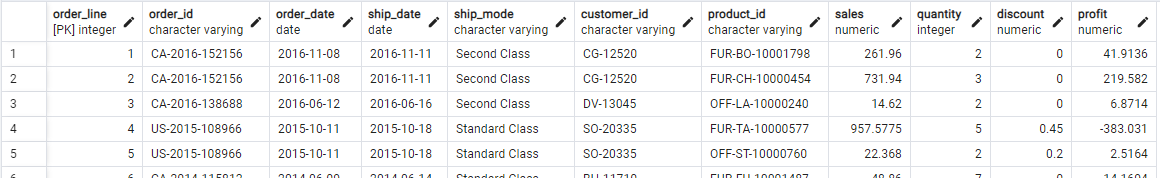

A back-up database .SQL file was also created in a similar file location as the CSVs in the event of data corruption.

# Data analysis

The data is now ready to be queried. Starting from the beginning:

### **1. Customer analysis:** Who are the 10 largest customers by total sales?

For this question the total sales value for each customer needs to be queried.

Most of the information required is in the sales table and will provide the top 5 total sales by customer id. However to understand who these customers are the associated customer name is also required. The JOIN function is used to extract the customer name from the customer table where the customer id matches the sales table. 

To obtain the total sales value the aggregate function SUM is used alongside the GROUP BY clause to obtain sales grouped by the customer id. It is then ordered by the total sales value using ORDER BY and finally LIMIT is used to give the top 5 results. 

Below is the input code: 

In [ ]:
SELECT
	a.customer_name,
	b.customer_id,
	SUM(b.sales) AS total_sales
FROM customer AS a
RIGHT JOIN sales AS b
ON a.customer_id = b.customer_id
GROUP BY a.customer_name, b.customer_id
ORDER BY total_sales DESC
LIMIT 10;

Here is the output of the code:

> 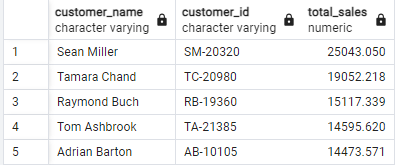

> The customer name, id and total sales is tallied for the top 5 customers.

### **2. Cities analysis:** Create a report showing the top 3 cities per state ranked by their unique orders.


Similar to the above scenario the required information needs to be queried from both customer and sales table. A similar method is employed using a LEFT JOIN to obtain data from both tables. Unique orders is required therefore COUNT and DISTINCT functions are used to obtain the number of these across each city. 

To rank these a windows function ROW_NUMBER is used to rank the top cities by order numbers within each state, saved as rank_n.

Finally since rank_n is needed to limit the cities to top 3 for each state however it is being defined in the same query, a sub-query is used to define, and then proceed to rank to avoid error.

In [ ]:
SELECT* FROM
(SELECT 
	b.state, 
	b.city,
 	COUNT(DISTINCT(a.order_id)) AS order_num,
	row_number() over (partition by b.state order by (SELECT COUNT(DISTINCT(a.order_id)) AS order_num) desc) as rank_n
FROM sales as a
LEFT JOIN customer as b
on a.customer_id = b.customer_id
GROUP BY b.state,b.city) as c
WHERE c.rank_n<=3;

The output is as follows:

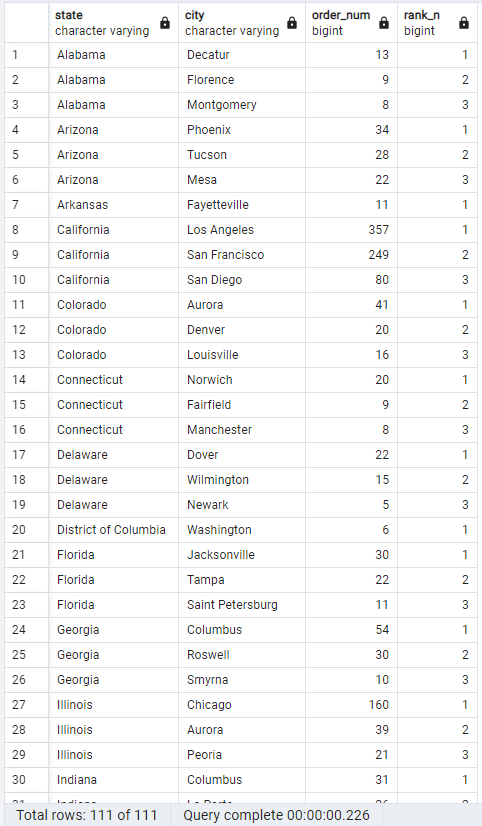

### **3. Seasonality analysis:** Analyse the Chair sub-category to determine if there seasonality in the sales.

For this the information required are month the order date falls in, the total sales during that month and a method to only select sub-category "Chair".

To obtain these the EXTRACT function is used to obtain the month from the order date, and the SUM function is once again used to obtain total sales. 

The above information is in the sales table and the Chair sub-category is in the product table. Both tables have product id in common. A subquery is used to only obtain product ids where the sub-category is in "Chair".

In [ ]:
SELECT EXTRACT(month FROM order_date) AS month_n, SUM(sales) AS total_sales FROM sales
WHERE product_id IN (SELECT product_id FROM product WHERE sub_category = 'Chairs')
GROUP BY month_n
ORDER BY month_n ;

The result is as follows:

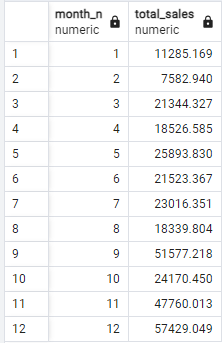

Visualising on the graph tool gives the following:

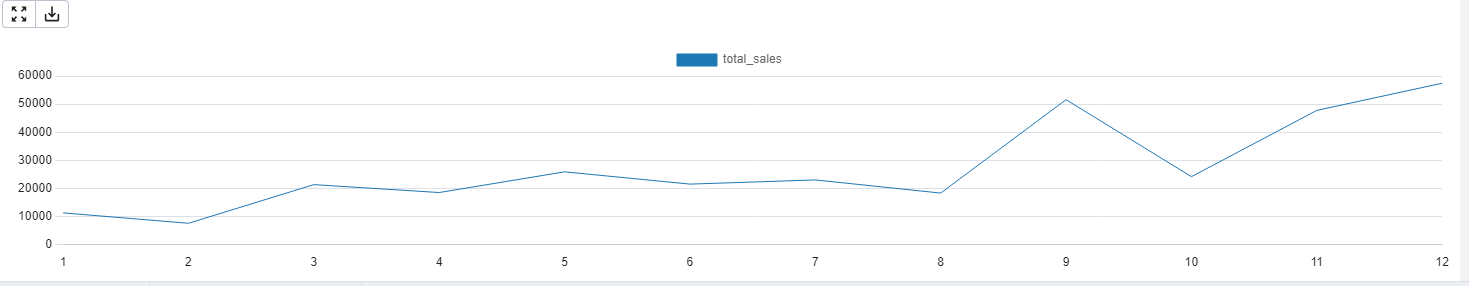

> From the above there is a seasonality in sales throughout the year where sales are dormant at 10K dollars at the start of the year in January-February and then stagenates at roughly 20K dollars during March-August. Between September-December (months 9-12) Chair sales kick in significantly where most months see sales above 40K dollars.

### **4. Dashboard in PowerBI:** The Sales Manager will be heading to a meeting with the Directors to review overall sales. 

### Create a dashboard in PowerBI with key Sales data including highest and lowest sale, highest and lowest profit and graphs for 10 largest customers by total sales, Seasonality of Chairs and the sales in the top 3 cities of the top 4 states.



To obtain the highest and lowest sales and profits the original .csv sales data is imported into PowerBI under the Home ribbon, under Data: Get Data-> Text/CSV. The location of the file is browsed and is imported in once done. The Card visual is the most suitable to represent these values so are represented by these.

To obtain the customer and chair sales data the SQL outputs from the previous exercises is copied into PowerBI. Once done column and line graphs are prepared for these respectively. Note for Chair data the months are converted into month names using the following DAX function:





In [ ]:
MonthName = FORMAT(DATE(1, [month_n], 1), "MMM")

Finally to obtain the orders of the top 3 cities across the top 4 performing states the output for this exercise requires a filter by the top 4 performing states.

To do this the below query is used to obtain the best performing states in terms of orders:

In [ ]:
SELECT 
	b.state,
 	COUNT(DISTINCT(a.order_id)) AS order_num
FROM sales as a
LEFT JOIN customer as b
on a.customer_id = b.customer_id
GROUP BY b.state
ORDER BY order_num DESC
LIMIT 4;

Below is the output:

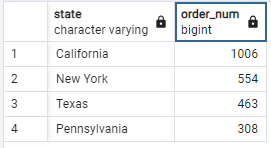

Now that the top 4 states are known the IN function will be used to filter the original query by these states:

In [ ]:
SELECT* FROM
(SELECT 
	b.state, 
	b.city,
 	COUNT(DISTINCT(a.order_id)) AS order_num,
	row_number() over (partition by b.state order by (SELECT COUNT(DISTINCT(a.order_id)) AS order_num) desc) as rank_n
FROM sales as a
LEFT JOIN customer as b
on a.customer_id = b.customer_id
GROUP BY b.state,b.city) as c
WHERE c.rank_n<=3 AND
c.state IN ('California','New York','Texas','Pennsylvania');

The output is as follows:

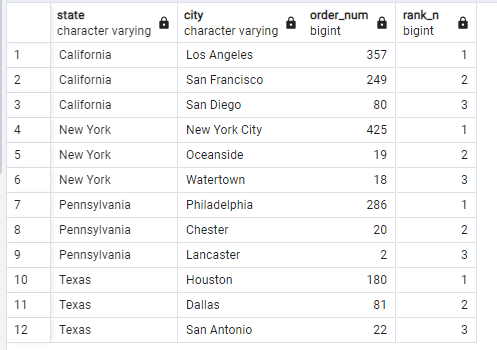

Similar to previous this table can be copied into PowerBI for visualisation.

Completing the visualisations for all the data uncovered thus far:

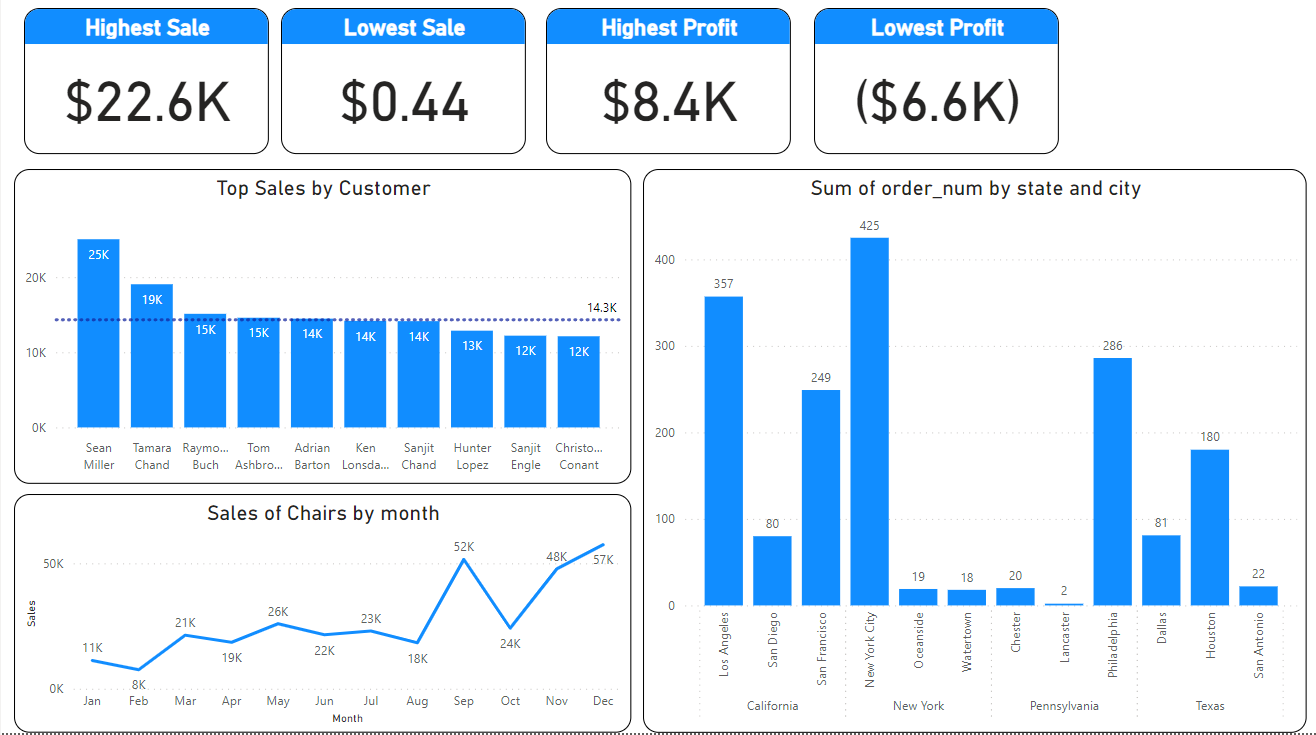

# **Make recommendations based on the above for the business to improve its sales.**

The recommendations based on the above information gathered are the following:

1. Incentives should be made for our top 5 customers to drive more business from them, e.g. providing special discounts or promotions based on products they buy the most from the business. This is especially true of Sean Miller and Tamara Chand who bring the most sales.

2. Implement a loyalty program for customers in cities where orders are occuring most. This would incentivise customers who are already spending to spend more and drive further business.

3. Design promotional offers during the Autumn season should be made for chairs to drive further business from customers during these peak sales months where customers purchase the most. One improvement on this is to inspect these for all categories of items to determine which ones sell the most in order to prioritise marketing budget towards.